In [1]:
# Train an MLP with 2 inputs, 3-4+ hidden units and one output on the
# following examples (XOR function):
# ((0, 0), 0)
# ((0, 1), 1)
# ((1, 0), 1)
# ((1, 1), 0)

import numpy as np
from MLP import MultiLayerPerceptron
from main import plot


[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0 0 0 0]
[[0.99984014]
 [0.99999995]
 [0.99999995]
 [0.99999997]]
[0.99999995]


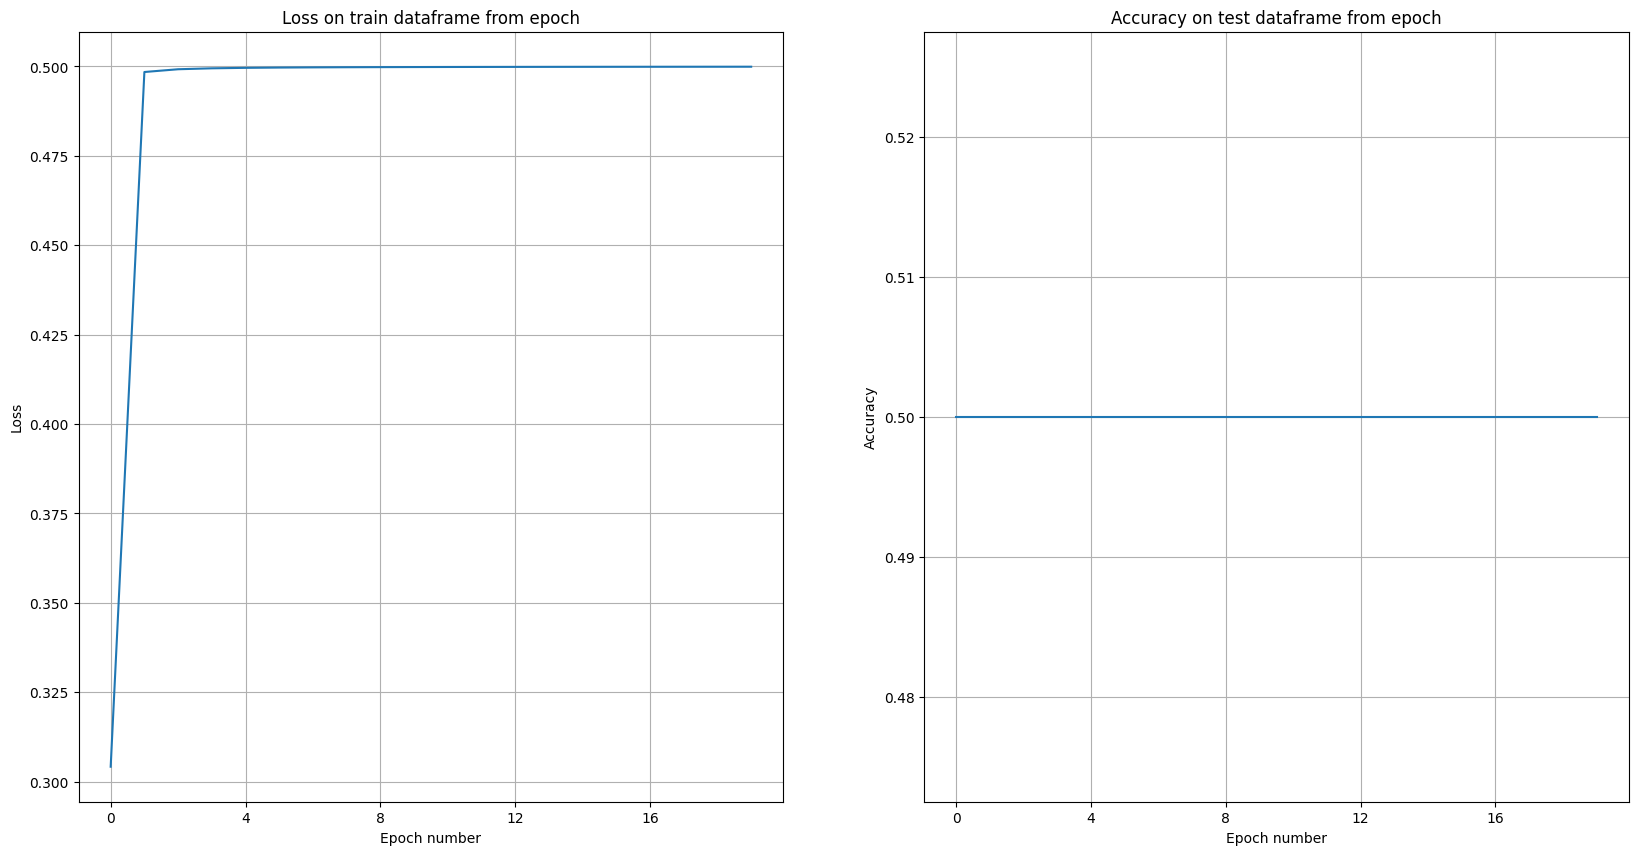

[0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
[0 0 0 0]
[[0.99984003]
 [0.99999996]
 [0.99999995]
 [0.99999997]]
[0.99999995]


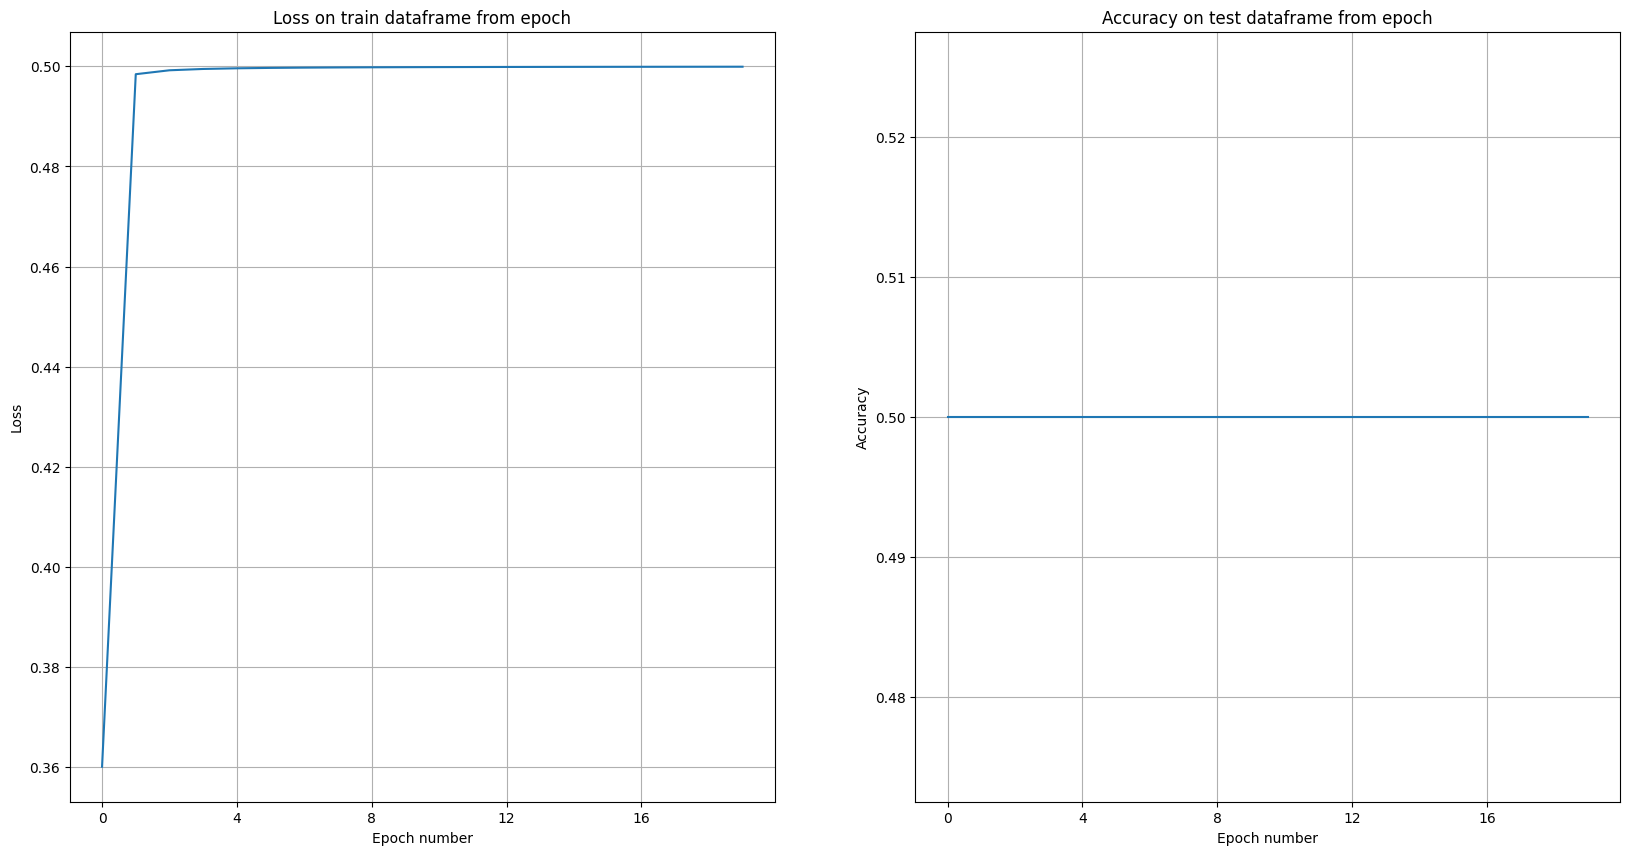

In [6]:
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

network = MultiLayerPerceptron(2, 5, 1)
network.randomise()

accuracy = []
loss = []
for i in range(10000):
    error = network.train(X, y, 0.5)
    # print(error)
    if i % 500 == 0:
        accuracy.append(network.accuracy(X, y))
        loss.append(error.mean())

print(accuracy)
plot(loss, accuracy, "mlp_fig1")
# print(accuracy)

y_pred = np.argmax(network.forward(X), axis=1)
print(y_pred)
print(network.forward(X))
print(network.forward([1, 0]))

In [3]:
train_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_outputs = np.array([[0], [1], [1], [0]])

mlp = MultiLayerPerceptron(n_inputs=2, n_hidden=4, n_outputs=1)

num_epochs = 1000
learning_rate = 0.1

for epoch in range(num_epochs):
    error = mlp.train(train_inputs, train_outputs, learning_rate)
    # Optionally, print or log the error for each epoch

test_inputs = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
test_outputs = np.array([[0], [1], [1], [0]])

accuracy = mlp.accuracy(test_inputs, test_outputs)
print(f"Test Accuracy: {accuracy}")



Test Accuracy: 0.5
